# **Project 2**, APS1070 Fall 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**

**Deadline: Oct 18, 23:59 - 20 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name:** **Haoying Sun**
*   **Student Number:** **1002112108**

### ***All quetsions are answered in italics.***

##**Part 1: Getting started** [4 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* **How many rows are there?** **[0.25]**
  *As shown by calling df or df.shape, there are 284,807 rows.* 

* **What features in the dataset are present aside from the 28 main features?**  **[0.25]**
  *Other features include time, the amount of transaction, and the class (real transaction and fraud transaction).*  

* **Which column contains the targets?** **[0.25]**
  *Column 31 contains the target (the class), which tells us if the transaction is real or fraud.*

* **To what do the target values correspond?** **[0.25]**
 *0 corresponds to a real transaction. 1 corresponds to a fraud transaction.*


In [ ]:
pip install wget

In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#Checking the dimension of the dataframe
df.shape

(284807, 31)

In [ ]:
#Checking the number of non-zero values
np.count_nonzero(df['Class'])

492

In [ ]:
#Looking at the indeces and the values of non-zero targets
series = pd.Series(df['Class'])
result = series.to_numpy().nonzero()
print(result)
values = series.iloc[(result)]
values


(array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
     

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

It's important when looking at a new dataset to figure out how many examples we have for each class.

* **What is the percentage of entries in the dataset for each class?** **[0.5]**
  *As shown, the percentage of real transactions is 99.83%. The percentage of fraud transaction is 0.17%.*

* **Is this data considered balanced or unbalanced? Why is this the case?** **[0.5]**
  *This dataset is unbalanced because it contains 99.83% of non-outliers and only 0.17% of outliers.*

* **Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?** **[0.5]**
  *The balance between outliers and non-ontliers is important because when training a model, unbalanced data cannot truly reflect the performance accuracy of the model. As a result, a bad model could achieve high performance accuracy at training stage and performs poorly when put into testing. For example, if a bad KNN classifier is trained with unbalanced data, the high percentage of non-outliers and low percentage of outliers can make the KNN classifier identify the outliers easily, therefore achieving a high performance accuracy.* 



In [ ]:
#Calcualting the percentage of 1 in the entire Class
percent_1 = np.count_nonzero(df['Class'])/len(df['Class'])*100
percent_0 = 100-percent_1

print("The percentage of real transactions is: ", percent_0, "%")
print("The percentage of fraud transactions is: ", percent_1, "%")


The percentage of real transactions is:  99.827251436938 %
The percentage of fraud transactions is:  0.1727485630620034 %


Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V20? Make sure to only use your training set for this calculation. _____ **[0.5]**

Use the code below to set up a Gaussian object for V20.

In [ ]:
#Splitting the original dataset
from sklearn.model_selection import train_test_split

df_features = df.drop(['Time','Class','Amount'], axis = 1)
df_target = pd.DataFrame(data=df['Class'])

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=0)

In [ ]:
from scipy import stats

#Calculating the mean and standard deviation of V20
X_train
V20 = X_train['V20']
m = len(V20)

norm = stats.norm(
    loc = np.sum(V20)/m,
    scale = np.std(V20)

)

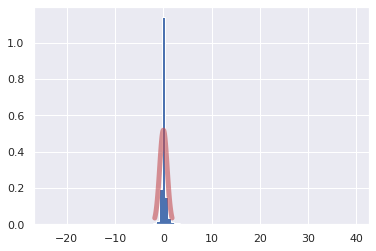

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V20'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()


We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [ ]:
#Changing y_train from a dataframe to a series
y_train_seri = y_train.iloc[:,0]
#y_train = y_train.to_numpy()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

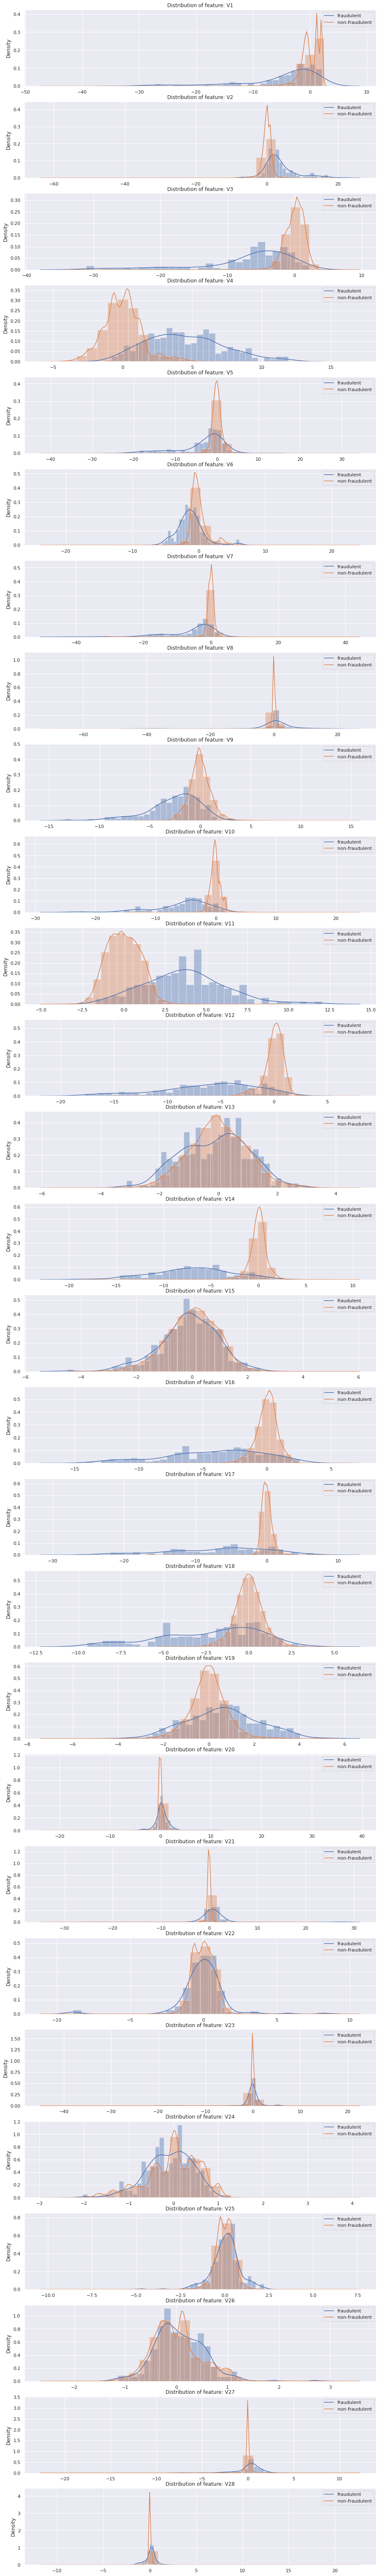

In [ ]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train_seri == 1], bins=30)
    sns.distplot(X_train[feat][y_train_seri == 0], bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

**Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model.** **[1]**
  *From some features, we can see real transactions and fradulant transactions have distinctly different values for the mean and the variance. Based on these differences we can build a model to distinguish fraudulent transactions from real transactions.*

## **Part 2: *Unsupervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. 

**1) Fit a Gaussian distribution on a feature of the full training dataset(this is unsupervised learning, we don't use the labels) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. [0.5]**

In [ ]:
#Changing V3 into an array for fitting
V3 = X_train['V3'].to_numpy().reshape(-1,1)

#Fitting a single gaussian distribution on V3
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(V3)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
#Calculating scores
c_V3 = gm.score_samples(V3)

**2) Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). [0.5]**

In [ ]:
#Computing AUC on the full training set
from sklearn.metrics import roc_auc_score
print ("AUC_fraud of Gaussian Mixture of V3: " , format(roc_auc_score(y_train, 1-c_V3), ".3f")  )
print ("AUC_real of Gaussian Mixture of V3: " , format(roc_auc_score(y_train, c_V3), ".3f") )

AUC_fraud of Gaussian Mixture of V3:  0.877
AUC_real of Gaussian Mixture of V3:  0.123


**3) Repeat the above steps for each of the features and present your findings in a table. [0.5]**

In [ ]:
#Converting X_train to a multi-dimensional array
X_train_arr = X_train.to_numpy().reshape(-1,28)
auc_fraud = []
auc_real = []
max_auc = 0

#Repeating steps above for all 28 features
for i in range (0,28):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  V_i = X_train_arr[:,i].reshape(-1,1)
  gm.fit(V_i)
  c = gm.score_samples(V_i)
  auc_fraud.append(roc_auc_score(y_train, 1-c))
  auc_real.append(roc_auc_score(y_train, c))
  #print ("AUC_fraud of Gaussian Mixture of V", i+1, "is: ", auc_fraud[i], "  ",
         
        #"AUC_real of Gaussian Mixture of V", i+1, "is: ", auc_real[i])
  if auc_fraud[i]>max_auc:
    max_auc = auc_fraud[i]
    j=i+1


In [ ]:
#Summarizing findings in a table
auc_fraud_P2_arr = np.array(auc_fraud).reshape(-1,1)
auc_real_P2_arr = np.array(auc_real).reshape(-1,1)
Data_tuple_P2 = (auc_fraud_P2_arr, auc_real_P2_arr)
Results_P2 = np.hstack(Data_tuple_P2)
Results_P2 = Results_P2.T
AUC_P2 = pd.DataFrame(data=Results_P2, 
                      columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],
                      index=['AUC for detecting fraudulent transactions', 'AUC for detecting real transactions'])
AUC_P2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
AUC for detecting fraudulent transactions,0.705102,0.837499,0.876537,0.892103,0.771825,0.73438,0.862967,0.773238,0.802874,0.9136,0.897175,0.92018,0.572152,0.952459,0.514764,0.902137,0.934852,0.80803,0.741874,0.734692,0.833521,0.561287,0.696326,0.469229,0.574918,0.503272,0.835479,0.814201
AUC for detecting real transactions,0.294898,0.162501,0.123463,0.107897,0.228175,0.26562,0.137033,0.226762,0.197126,0.0864,0.102825,0.07982,0.427848,0.047541,0.485236,0.097863,0.065148,0.19197,0.258126,0.265308,0.166479,0.438713,0.303674,0.530771,0.425082,0.496728,0.164521,0.185799


In [ ]:
print("The maximum AUC_fraud is: ", max_auc)
print("The best feature for detecting fraudulent transactions is: V ", j)

The maximum AUC_fraud is:  0.9524586211308497
The best feature for detecting fraudulent transactions is: V  14


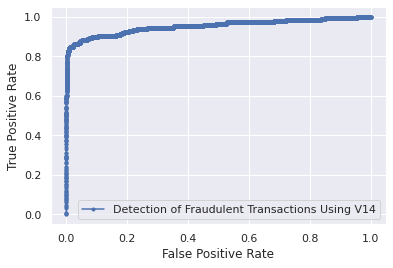

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

V14 = X_train['V14'].to_numpy().reshape(-1,1)
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(V14)
c_V14 = gm.score_samples(V14)
fpr_fraud, tpr_fraud, _ = roc_curve(y_train, 1-c_V14)

#V24 = X_train['V24'].to_numpy().reshape(-1,1)
#gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
#gm.fit(V24)
#c_V24 = gm.score_samples(V24)
#fpr_real, tpr_real, _ = roc_curve(y_train, c_V24)

#pyplot.plot(fpr_real, tpr_real, linestyle = '--', label='Detection of Real Transactions')
pyplot.plot(fpr_fraud, tpr_fraud, marker='.', label='Detection of Fraudulent Transactions Using V14')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**4) Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. [0.5]**

*As shown, the best feature for detecting fraudulent transactions is V14, as it gives the highest AUC which is 0.95.*

In [ ]:
print("The maximum AUC_fraud is: ", max_auc)
print("The best feature for detecting fraudulent transactions is: V", j)

The maximum AUC_fraud is:  0.9524586211308497
The best feature for detecting fraudulent transactions is: V 14


**5) To make a prediction based on a model's scores: If the ``score_samples`` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. It's worth noting that for this last step, we're now using class labels for the first time, and so this method could be considered semi-supervised. [1]**

In [ ]:
#Find the best k for V14, using an increment of 10
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

V_14 = X_train['V14'].to_numpy().reshape(-1,1)
c_V14 = gm.score_samples(V_14)
precision_V14 = []
recall_V14 = []
F1_V14 = []
k = np.arange(0,1000,10).reshape(100,1)

for i in range (0, 1000, 10):
  mn_V14 = sorted(c_V14)[i]
  precision_V14 = precision_score(y_train, c_V14 < mn_V14)
  recall_V14 = recall_score(y_train, c_V14 < mn_V14)
  F1_V14.append(2*precision_V14*recall_V14/(precision_V14+recall_V14))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


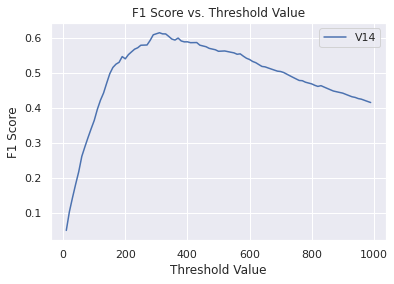

The maximum F1 score is:  0.6137404580152672
The corresponding K value is:  310
The corresponding threshold value is:  -94.97894820364534


In [ ]:
#Plotting F1 score vs. K values
F1_V14 = np.reshape(F1_V14, (-1,1))
pyplot.plot(k, F1_V14, linestyle = '-', label='V14')
pyplot.xlabel('Threshold Value')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Threshold Value')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_V14 = np.nan_to_num(F1_V14)

#Print the maximum F1 score and tis corresponding K value
print("The maximum F1 score is: ", np.amax(F1_V14))
print("The corresponding K value is: ", F1_V14.argmax()*10)
print("The corresponding threshold value is: ", sorted(c_V14)[F1_V14.argmax()])

## **Part 3: *Supervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
This part is similar to Part 2, but here we only fit a Gaussian distribution to the non-fraudulent transactions (and not all training data).







**1) Fit a Gaussian distribution on a feature of non-fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. [0.5]**

In [ ]:
V3 = X_train['V3'].to_numpy().reshape(-1,1)
y_train = y_train.to_numpy()

#Extracting the indices of real transactions and fraud transactions in V3
real_transac = np.where(y_train == 0)[0]
fraud_transac = np.nonzero(y_train)[0]
print(real_transac)
print(fraud_transac)

[     0      1      2 ... 199361 199362 199363]
[   126    405    695   3205   3522   3646   3673   3764   3950   5574
   6887   8127   8225   8330   8530   8706   9400  10214  10743  11276
  12727  13544  14055  14879  15345  15535  16102  16172  16506  17459
  17596  18462  18817  18939  19438  19699  19938  20001  20021  20469
  20882  21326  21824  21875  23106  23124  23384  24625  25142  26372
  26473  28065  30147  30244  30932  31223  31944  32265  32308  32581
  33303  33824  34099  34603  34712  34848  35054  40041  41573  41610
  42659  43108  43216  43698  45329  45506  45934  46660  47650  47669
  48579  49045  49739  49772  50054  50229  51778  52897  53421  53511
  53513  55219  55927  56118  56145  56194  57327  57566  57822  58112
  58335  58911  59375  59933  60967  61780  62032  62318  62490  62808
  63355  63662  63686  63845  63936  64311  64579  64989  65735  65746
  66095  66107  66203  66827  69290  70341  70581  72046  72096  72520
  73089  73133  73292  74017 

In [ ]:
#Fitting a single gaussian distribution on real transactions only in V3
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(V3_real)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
#calculating scores
c_V3_real = gm.score_samples(V3)

**2) Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). [0.5]**

In [ ]:
print ("AUC_fraud of Gaussian Mixture of V3: " , format(roc_auc_score(y_train, 1-c_V3_real), ".3f")  )
print ("AUC_real of Gaussian Mixture of V3: " , format(roc_auc_score(y_train, c_V3_real), ".3f") )

AUC_fraud of Gaussian Mixture of V3:  0.877
AUC_real of Gaussian Mixture of V3:  0.123


**3) Repeat the above steps for each of the features and present your findings in a table. [0.5]**

In [ ]:
X_train_arr.shape

(199364, 28)

In [ ]:
#Converting X_train to a multi-dimensional array

auc_fraud_P3 = []
auc_real_P3 = []
max_auc_P3 = 0

#Repeating steps above for all 28 features
for i in range (0,28):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  V_real = X_train_arr[real_transac,i].reshape(-1,1)
  gm.fit(V_real) 
  V_i = X_train_arr[:,i].reshape(-1,1)
  c = gm.score_samples(V_i)
  auc_fraud_P3.append(roc_auc_score(y_train, 1-c))
  auc_real_P3.append(roc_auc_score(y_train, c))
  
  #print ("AUC_fraud of Gaussian Mixture of V", i+1, "is: ", auc_fraud_P3[i], "  ",
         
         #"AUC_real of Gaussian Mixture of V", i+1, "is: ", auc_real_P3[i])
  if auc_fraud_P3[i]>max_auc_P3:
    max_auc_P3 = auc_fraud_P3[i]
    j=i+1

In [ ]:
#Summarizing findings in a table
auc_fraud_P3_arr = np.array(auc_fraud_P3).reshape(-1,1)
auc_real_P3_arr = np.array(auc_real_P3).reshape(-1,1)
Data_tuple_P3 = (auc_fraud_P3_arr, auc_real_P3_arr)
Results_P3 = np.hstack(Data_tuple_P3)
Results_P3 = Results_P3.T
AUC_P3 = pd.DataFrame(data=Results_P3, 
                      columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],
                      index=['AUC for detecting fraudulent transactions', 'AUC for detecting real transactions'])
AUC_P3

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
AUC for detecting fraudulent transactions,0.70535,0.838015,0.877392,0.892612,0.771881,0.734514,0.863167,0.773353,0.803263,0.913558,0.897612,0.920788,0.572142,0.952599,0.514781,0.902069,0.93444,0.80798,0.741989,0.734835,0.833878,0.561289,0.696345,0.469245,0.574931,0.503278,0.835538,0.814264
AUC for detecting real transactions,0.29465,0.161985,0.122608,0.107388,0.228119,0.265486,0.136833,0.226647,0.196737,0.086442,0.102388,0.079212,0.427858,0.047401,0.485219,0.097931,0.06556,0.19202,0.258011,0.265165,0.166122,0.438711,0.303655,0.530755,0.425069,0.496722,0.164462,0.185736


In [ ]:
print("The maximum AUC_fraud is: ", max_auc_P3)
print("The best feature for detecting fraudulent transactions is: V ", j)

The maximum AUC_fraud is:  0.9525990781886603
The best feature for detecting fraudulent transactions is: V  14


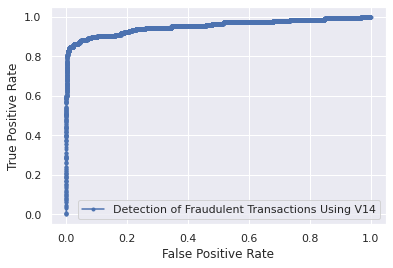

In [ ]:
##Plotting ROC curve

V14= X_train['V14'].to_numpy().reshape(-1,1)
V14_real = V14[real_transac,0].reshape(-1,1)
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(V14_real)
c_V14_P3 = gm.score_samples(V14)
fpr_fraud_P3, tpr_fraud_P3, _ = roc_curve(y_train, 1-c_V14_P3)

#V24 = X_train['V24'].to_numpy().reshape(-1,1)
#V24_real = V24[real_transac,0].reshape(-1,1)
#gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
#gm.fit(V24_real)
#c_V24_P3 = gm.score_samples(V24)
#fpr_real_P3, tpr_real_P3, _ = roc_curve(y_train, c_V24_P3)

pyplot.plot(fpr_fraud_P3, tpr_fraud_P3, marker='.', label='Detection of Fraudulent Transactions Using V14')
#pyplot.plot(fpr_real_P3, tpr_real_P3, linestyle='--', label='Detection of Real Transactions')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**4) Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. [0.5]**

In [ ]:
print("The maximum AUC_fraud is: ", max_auc_P3)
print("The best feature for detecting fraudulent transactions is: V ", j)

The maximum AUC_fraud is:  0.9525990781886603
The best feature for detecting fraudulent transactions is: V  14


**5) Find an optimal threshold that maximizes the F1 Score in the training set. [0.5]**

In [ ]:
#Checking 1000 K values by an increment of 10

precision_V14_P3 = []
recall_V14_P3 = []
F1_V14_P3 = []
k = np.arange(0,1000,10).reshape(100,1)

for i in range (0, 1000, 10):
  mn_V14_P3 = sorted(c_V14_P3)[i]
  precision_V14_P3 = precision_score(y_train, c_V14_P3 < mn_V14_P3)
  recall_V14_P3 = recall_score(y_train, c_V14_P3 < mn_V14_P3)
  F1_V14_P3.append(2*precision_V14_P3*recall_V14_P3/(precision_V14_P3+recall_V14_P3))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


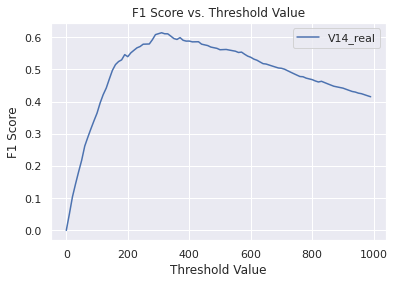

In [ ]:
#Plotting F1 socre vs. K values
F1_V14_P3 = np.reshape(F1_V14, (-1,1))
pyplot.plot(k, F1_V14_P3, linestyle = '-', label='V14_real')
pyplot.xlabel('Threshold Value')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Threshold Value')
pyplot.legend()
pyplot.show()

In [ ]:
#Replacing NaN with 0
F1_V14_P3 = np.nan_to_num(F1_V14_P3)

#Print the maximum F1 score and its corresponding K value
print("The maximum F1 score is: ", np.amax(F1_V14_P3))
print("The corresponding K value is: ", F1_V14_P3.argmax()*10)
print("The corresponding threshold value is: ", sorted(c_V14_P3)[F1_V14_P3.argmax()])

The maximum F1 score is:  0.6137404580152672
The corresponding K value is:  310
The corresponding threshold value is:  -107.86900893293654


**6) Compare your results with Part 2 - does using a model based on the full dataset vs a model based only on non-fraudulent data make a big difference on performance? [0.5]**

*The F1 score and the optimal K value obtained using the model built based non-fraudulant transactions are the same as those obtained using the model built on the full dataset. This is mainly due to the imbalance between non-fraudulent transactions and fraudulent transactions. As the number of fraudulent transactions is significantly smaller than that of non-fraudulent transactions, removing fraudulent transactions for building the model will result in little to no effect on the final F1 score.*

## **Part 4: *Supervised,* Two Gaussians** -- Single feature model with two Gaussian distributions. [3 Marks]
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.





**1) Fit a Gaussian distribution ($G_1$) on a feature of non-fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. Use the feature that lead to the best AUC in Part 3. [0.5]**

In [ ]:
#As shown in P3, non-fraudulant transactions of V14 has already been extracted and stored as V14_real

gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm1.fit(V14_real)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

**2) Fit another Gaussian distribution ($G_2$) on the same feature but for fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. [0.5]**



In [ ]:
V14_fraud = V14[fraud_transac,0].reshape(-1,1)

gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm2.fit(V14_fraud)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

**3) Compute the score samples ($S$) for both $G_1$ and $G_2$ on the whole training set to get $S_1$ and $S_2$, respectively. [0.5]**

In [ ]:
S1_V14 = gm1.score_samples(V14)
S2_V14 = gm2.score_samples(V14)

In [ ]:
S1_V14

array([-0.95442664, -0.81316089, -1.64454147, ..., -0.81938834,
       -1.93666483, -0.81323822])

**4) Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$ then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). [0.5]**

In [ ]:
#Sweeping c from 0 to 1000 to find the one that optimizes F1 score
F1_V14_P4 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_V14_P4 = precision_score(y_train, S1_V14 < S2_V14*i)
  recall_V14_P4 = recall_score(y_train, S1_V14 < S2_V14*i)
  F1_V14_P4.append(2*precision_V14_P4*recall_V14_P4/(precision_V14_P4+recall_V14_P4))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


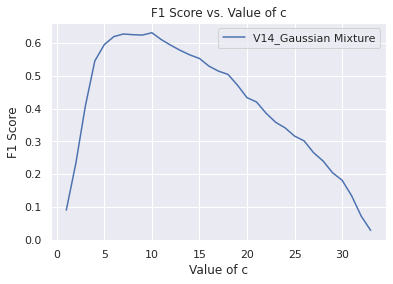

The maximum F1 score is:  0.6309148264984228
The corresponding c value is:  10


In [ ]:
#Plotting F1 socre vs. c values

F1_V14_P4 = np.reshape(F1_V14_P4, (-1,1))
pyplot.plot(c, F1_V14_P4, linestyle = '-', label='V14_Gaussian Mixture')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_V14_P4 = np.nan_to_num(F1_V14_P4)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_V14_P4))
print("The corresponding c value is: ", F1_V14_P4.argmax()+1)


**5) Repeat the steps above for at least two other features. [1]**

In [ ]:
#Repeating the steps above for V12
#Fitting the Gaussian distribution and calculating S1 and S2
V12= X_train['V12'].to_numpy().reshape(-1,1)
V12_real = V12[real_transac,0].reshape(-1,1)
V12_fraud = V12[fraud_transac,0].reshape(-1,1)

gm3 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm3.fit(V12_real)

gm4 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm4.fit(V12_fraud)

S1_V12 = gm3.score_samples(V12)
S2_V12 = gm4.score_samples(V12)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


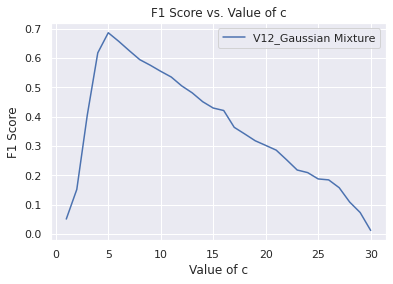

The maximum F1 score is:  0.6866666666666666
The corresponding c value is:  5


In [ ]:
#Finding the optimal c value
F1_V12_P4 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_V12_P4 = precision_score(y_train, S1_V12 < S2_V12*i)
  recall_V12_P4 = recall_score(y_train, S1_V12 < S2_V12*i)
  F1_V12_P4.append(2*precision_V12_P4*recall_V12_P4/(precision_V12_P4+recall_V12_P4))

F1_V12_P4 = np.reshape(F1_V12_P4, (-1,1))
pyplot.plot(c, F1_V12_P4, linestyle = '-', label='V12_Gaussian Mixture')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_V12_P4 = np.nan_to_num(F1_V12_P4)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_V12_P4))
print("The corresponding c value is: ", F1_V12_P4.argmax()+1)

In [ ]:
#Repeating the steps above for V17
#Fitting the Gaussian distribution and calculating S1 and S2
V17 = X_train['V17'].to_numpy().reshape(-1,1)
V17_real = V17[real_transac,0].reshape(-1,1)
V17_fraud = V17[fraud_transac,0].reshape(-1,1)

gm5 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm5.fit(V17_real)

gm6 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm6.fit(V17_fraud)

S1_V17 = gm5.score_samples(V17)
S2_V17 = gm6.score_samples(V17)

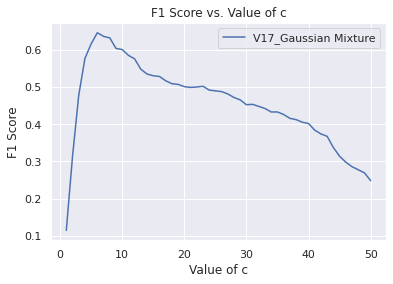

The maximum F1 score is:  0.645925925925926
The corresponding c value is:  6


In [ ]:
#Finding the optimal c value
F1_V17_P4 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_V17_P4 = precision_score(y_train, S1_V17 < S2_V17*i)
  recall_V17_P4 = recall_score(y_train, S1_V17 < S2_V17*i)
  F1_V17_P4.append(2*precision_V17_P4*recall_V17_P4/(precision_V17_P4+recall_V17_P4))

F1_V17_P4 = np.reshape(F1_V17_P4, (-1,1))
pyplot.plot(c, F1_V17_P4, linestyle = '-', label='V17_Gaussian Mixture')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_V17_P4 = np.nan_to_num(F1_V17_P4)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_V17_P4))
print("The corresponding c value is: ", F1_V17_P4.argmax()+1)

## **Part 5: Multivariate and Mixture of Gaussians Distribution** [6 Marks]
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. **Make sure you have at least one model of each group**.
* You can use supervised and/or unsupervised methods. **Make sure you have at least one model of each group**.

It is up to you how to design your model. Try at least 12 different models and report the AUC and best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? **Summarize your findings with tables and plots.** **[6]**

**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


**Model 1: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 12, 14 and 17 all together, with n_components = 1.**

In [ ]:
#Combining V12, V14 and V17 non-fraudulent transactions together
M1_tuple_real = (V12_real, V14_real, V17_real)
M1_real = np.hstack(M1_tuple_real)
#Combining V12,V14 and V17 fraudulent transactions together
M1_tuple_fraud = (V12_fraud, V14_fraud, V17_fraud)
M1_fraud = np.hstack(M1_tuple_fraud)

#Fit Gaussian distribution with n_components = 1
gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm1.fit(M1_real)

gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm2.fit(M1_fraud)

#Combining to create the entire training dataset
M1_tuple_data = (V12,V14,V17)
M1_X_train = np.hstack(M1_tuple_data) 

#Calculate scores for real and fraud transactions
S_M1_real = gm1.score_samples (M1_X_train)
S_M1_fraud = gm2.score_samples (M1_X_train)

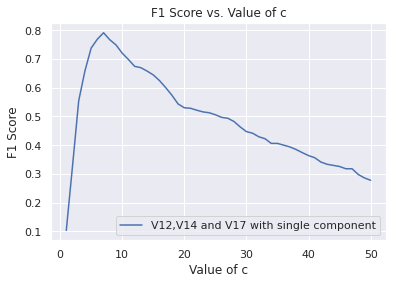

The maximum F1 score is:  0.7919876733436055
The corresponding c value is:  7


In [ ]:
#Finding optimal c value
F1_M1 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_M1 = precision_score(y_train, S_M1_real < S_M1_fraud*i)
  recall_M1 = recall_score(y_train, S_M1_real < S_M1_fraud*i)
  F1_M1.append(2*precision_M1*recall_M1/(precision_M1+recall_M1))

F1_M1 = np.reshape(F1_M1, (-1,1))
pyplot.plot(c, F1_M1, linestyle = '-', label='V12,V14 and V17 with single component')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M1 = np.nan_to_num(F1_M1)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_M1))
print("The corresponding c value is: ", F1_M1.argmax()+1)

M1_F1 = np.amax(F1_M1)


**Model 2: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 12, 14 and 17 all together, with n_components = 3.**

In [ ]:
#Fit Gaussian distribution with n_components = 3
gm1 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm1.fit(M1_real)

gm2 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm2.fit(M1_fraud)

#Combining to create the entire training dataset
M2_tuple_data = (V12,V14,V17)
M2_X_train = np.hstack(M2_tuple_data) 

#Calculate scores for real and fraud transactions
S_M2_real = gm1.score_samples (M1_X_train)
S_M2_fraud = gm2.score_samples (M1_X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


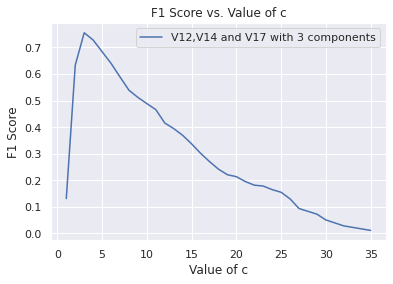

The maximum F1 score is:  0.7553648068669528
The corresponding c value is:  3


In [ ]:
#Finding optimal c value
F1_M2 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_M2 = precision_score(y_train, S_M2_real < S_M2_fraud*i)
  recall_M2 = recall_score(y_train, S_M2_real < S_M2_fraud*i)
  F1_M2.append(2*precision_M2*recall_M2/(precision_M2+recall_M2))

F1_M2 = np.reshape(F1_M2, (-1,1))
pyplot.plot(c, F1_M2, linestyle = '-', label='V12,V14 and V17 with 3 components')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M2 = np.nan_to_num(F1_M2)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_M2))
print("The corresponding c value is: ", F1_M2.argmax()+1)

M2_F1 = np.amax(F1_M2)


**Model 3: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 12, 14 and 17 all together, with n_components = 5.**

In [ ]:
#Fit Gaussian distribution with n_components = 5
gm1 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm1.fit(M1_real)

gm2 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm2.fit(M1_fraud)

#Combining to create the entire training dataset
M3_tuple_data = (V12,V14,V17)
M3_X_train = np.hstack(M3_tuple_data) 

#Calculate scores for real and fraud transactions
S_M3_real = gm1.score_samples (M3_X_train)
S_M3_fraud = gm2.score_samples (M3_X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


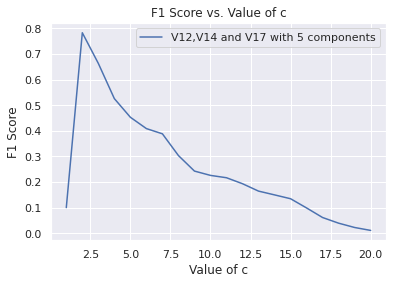

The maximum F1 score is:  0.7827380952380953
The corresponding c value is:  2


In [ ]:
#Finding optimal c value
F1_M3 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_M3 = precision_score(y_train, S_M3_real < S_M3_fraud*i)
  recall_M3 = recall_score(y_train, S_M3_real < S_M3_fraud*i)
  F1_M3.append(2*precision_M3*recall_M3/(precision_M3+recall_M3))

F1_M3 = np.reshape(F1_M3, (-1,1))
pyplot.plot(c, F1_M3, linestyle = '-', label='V12,V14 and V17 with 5 components')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M3 = np.nan_to_num(F1_M3)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_M3))
print("The corresponding c value is: ", F1_M3.argmax()+1)

M3_F1 = np.amax(F1_M3)


**Model 4: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 12, 14 and 17 all together, with n_components = 10.**

In [ ]:
#Fit Gaussian distribution with n_components = 10
gm1 = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
gm1.fit(M1_real)

gm2 = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
gm2.fit(M1_fraud)

#Combining to create the entire training dataset
M4_tuple_data = (V12,V14,V17)
M4_X_train = np.hstack(M4_tuple_data) 

#Calculate scores for real and fraud transactions
S_M4_real = gm1.score_samples (M4_X_train)
S_M4_fraud = gm2.score_samples (M4_X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


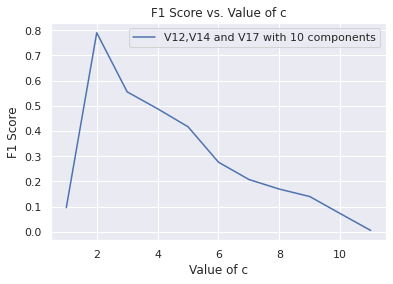

The maximum F1 score is:  0.7901234567901235
The corresponding c value is:  2


In [ ]:
#Finding optimal c value
F1_M4 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_M4 = precision_score(y_train, S_M4_real < S_M4_fraud*i)
  recall_M4 = recall_score(y_train, S_M4_real < S_M4_fraud*i)
  F1_M4.append(2*precision_M4*recall_M4/(precision_M4+recall_M4))

F1_M4 = np.reshape(F1_M4, (-1,1))
pyplot.plot(c, F1_M4, linestyle = '-', label='V12,V14 and V17 with 10 components')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M4 = np.nan_to_num(F1_M4)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_M4))
print("The corresponding c value is: ", F1_M4.argmax()+1)

M4_F1 = np.amax(F1_M4)


**Model 5: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 10, 12, 14, 16 and 17 all together, with n_components = 1.**

In [ ]:
#Combining V10,12,14,16,17 together
V10 = X_train['V10'].to_numpy().reshape(-1,1)
V10_real = V10[real_transac,0].reshape(-1,1)
V10_fraud = V10[fraud_transac,0].reshape(-1,1)

V16 = X_train['V16'].to_numpy().reshape(-1,1)
V16_real = V16[real_transac,0].reshape(-1,1)
V16_fraud = V16[fraud_transac,0].reshape(-1,1)

#Combining V10,12,14,16,17 real transactions together
M5_tuple_real = (V10_real, V12_real, V14_real, V16_real, V17_real)
M5_real = np.hstack(M5_tuple_real)

#Combining V10,12,14,16,17 fraud transactions together
M5_tuple_fraud = (V10_fraud, V12_fraud, V14_fraud, V16_fraud, V17_fraud)
M5_fraud = np.hstack(M5_tuple_fraud)

#Creating X_train containing these features
M5_data = (V10, V12, V14, V16, V17)
M5_X_train = np.hstack(M5_data)

In [ ]:
#Fit Gaussian distribution with n_components = 1
gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm1.fit(M5_real)

gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm2.fit(M5_fraud)

#Calculate scores for real and fraud transactions
S_M5_real = gm1.score_samples (M5_X_train)
S_M5_fraud = gm2.score_samples (M5_X_train)

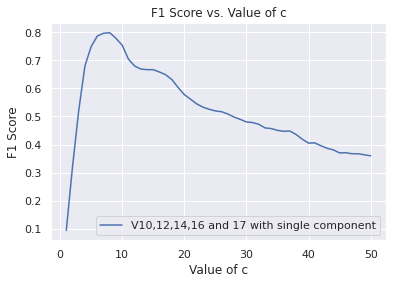

The maximum F1 score is:  0.7981510015408321
The corresponding c value is:  8


In [ ]:
#Finding optimal c value
F1_M5 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_M5 = precision_score(y_train, S_M5_real < S_M5_fraud*i)
  recall_M5 = recall_score(y_train, S_M5_real < S_M5_fraud*i)
  F1_M5.append(2*precision_M5*recall_M5/(precision_M5+recall_M5))

F1_M5 = np.reshape(F1_M5, (-1,1))
pyplot.plot(c, F1_M5, linestyle = '-', label='V10,12,14,16 and 17 with single component')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M5 = np.nan_to_num(F1_M5)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_M5))
print("The corresponding c value is: ", F1_M5.argmax()+1)

M5_F1 = np.amax(F1_M5)

**Model 6: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 10, 12, 14, 16 and 17 all together, with n_components = 5.**

In [ ]:
#Fit Gaussian distribution with n_components = 5
gm1 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm1.fit(M5_real)

gm2 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm2.fit(M5_fraud)

#Calculate scores for real and fraud transactions
S_M6_real = gm1.score_samples (M5_X_train)
S_M6_fraud = gm2.score_samples (M5_X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


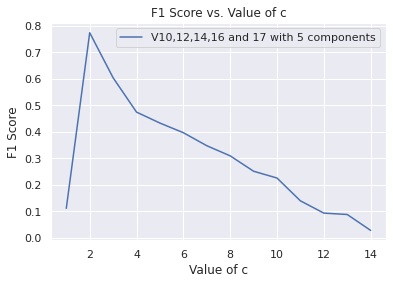

The maximum F1 score is:  0.7744807121661721
The corresponding c value is:  2


In [ ]:
#Finding optimal c value
F1_M6 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_M6 = precision_score(y_train, S_M6_real < S_M6_fraud*i)
  recall_M6 = recall_score(y_train, S_M6_real < S_M6_fraud*i)
  F1_M6.append(2*precision_M6*recall_M6/(precision_M6+recall_M6))

F1_M6 = np.reshape(F1_M6, (-1,1))
pyplot.plot(c, F1_M6, linestyle = '-', label='V10,12,14,16 and 17 with 5 components')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M6 = np.nan_to_num(F1_M6)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_M6))
print("The corresponding c value is: ", F1_M6.argmax()+1)

M6_F1 = np.amax(F1_M6)

**Model 7: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 10, 12, 14, 16 and 17 all together, with n_components = 3.**

In [ ]:
#Fit Gaussian distribution with n_components = 3
gm1 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm1.fit(M5_real)

gm2 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm2.fit(M5_fraud)

#Calculate scores for real and fraud transactions
S_M7_real = gm1.score_samples (M5_X_train)
S_M7_fraud = gm2.score_samples (M5_X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


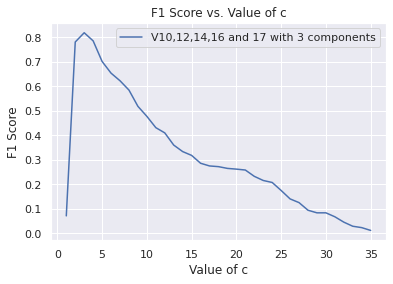

The maximum F1 score is:  0.8184615384615386
The corresponding c value is:  3


In [ ]:
#Finding optimal c value
F1_M7 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_M7 = precision_score(y_train, S_M7_real < S_M7_fraud*i)
  recall_M7 = recall_score(y_train, S_M7_real < S_M7_fraud*i)
  F1_M7.append(2*precision_M7*recall_M7/(precision_M7+recall_M7))

F1_M7 = np.reshape(F1_M7, (-1,1))
pyplot.plot(c, F1_M7, linestyle = '-', label='V10,12,14,16 and 17 with 3 components')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M7 = np.nan_to_num(F1_M7)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_M7))
print("The corresponding c value is: ", F1_M7.argmax()+1)

M7_F1 = np.amax(F1_M7)

**Model 8: Semi-supervised (fit on the whole training data). Fit feature 10, 12, 14, 16 and 17 all together, with n_components = 1.**

In [ ]:
#Find the best k using an increment of 10

gm_M8 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_M8.fit(M5_X_train)
S_M8 = gm_M8.score_samples(M5_X_train)
precision_M8 = []
recall_M8 = []
F1_M8 = []
k = np.arange(0,1000,10).reshape(100,1)

for i in range (0, 1000, 10):
  mn_M8 = sorted(S_M8)[i]
  precision_M8 = precision_score(y_train, S_M8 < mn_M8)
  recall_M8 = recall_score(y_train, S_M8 < mn_M8)
  F1_M8.append(2*precision_M8*recall_M8/(precision_M8+recall_M8))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


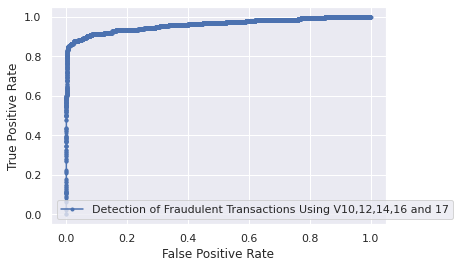

In [ ]:
#Plot the AUC curve
fpr_fraud_M8, tpr_fraud_M8, _ = roc_curve(y_train, 1-S_M8)

pyplot.plot(fpr_fraud_M8, tpr_fraud_M8, marker='.', label='Detection of Fraudulent Transactions Using V10,12,14,16 and 17')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

M8_AUC = roc_auc_score(y_train, 1-S_M8)

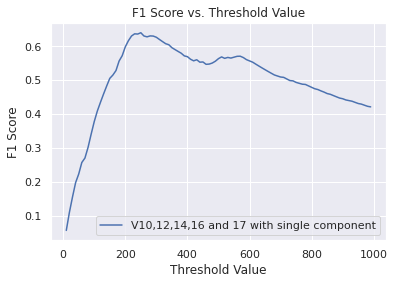

The maximum F1 score is:  0.6397306397306398
The corresponding K value is:  250
The corresponding threshold value is:  -609.392867152946


In [ ]:
#Plotting F1 score vs. K values
F1_M8 = np.reshape(F1_M8, (-1,1))
pyplot.plot(k, F1_M8, linestyle = '-', label='V10,12,14,16 and 17 with single component')
pyplot.xlabel('Threshold Value')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Threshold Value')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M8 = np.nan_to_num(F1_M8)

#Print the maximum F1 score and tis corresponding K value
print("The maximum F1 score is: ", np.amax(F1_M8))
print("The corresponding K value is: ", F1_M8.argmax()*10)
print("The corresponding threshold value is: ", sorted(S_M8)[F1_M8.argmax()])

M8_F1 = np.amax(F1_M8)

**Model 9: Semi-supervised. Fit feature 10, 12, 14, 16 and 17 all together, with n_components = 5.**

In [ ]:
#Find the best k using an increment of 10

gm_M9 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm_M9.fit(M5_X_train)
S_M9 = gm_M9.score_samples(M5_X_train)
precision_M9 = []
recall_M9 = []
F1_M9 = []
k = np.arange(0,1000,10).reshape(100,1)

for i in range (0, 1000, 10):
  mn_M9 = sorted(S_M9)[i]
  precision_M9 = precision_score(y_train, S_M9 < mn_M9)
  recall_M9 = recall_score(y_train, S_M9 < mn_M9)
  F1_M9.append(2*precision_M9*recall_M9/(precision_M9+recall_M9))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


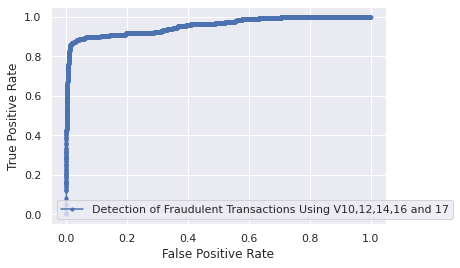

In [ ]:
#Plot the AUC curve
fpr_fraud_M9, tpr_fraud_M9, _ = roc_curve(y_train, 1-S_M9)

pyplot.plot(fpr_fraud_M9, tpr_fraud_M9, marker='.', label='Detection of Fraudulent Transactions Using V10,12,14,16 and 17')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

M9_AUC = roc_auc_score(y_train, 1-S_M9)

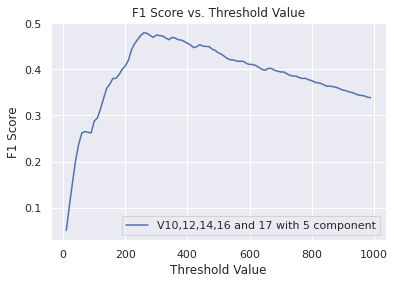

The maximum F1 score is:  0.4793388429752066
The corresponding K value is:  260
The corresponding threshold value is:  -37.54287960327397


In [ ]:
#Plotting F1 score vs. K values
F1_M9 = np.reshape(F1_M9, (-1,1))
pyplot.plot(k, F1_M9, linestyle = '-', label='V10,12,14,16 and 17 with 5 component')
pyplot.xlabel('Threshold Value')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Threshold Value')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M9 = np.nan_to_num(F1_M9)

#Print the maximum F1 score and tis corresponding K value
print("The maximum F1 score is: ", np.amax(F1_M9))
print("The corresponding K value is: ", F1_M9.argmax()*10)
print("The corresponding threshold value is: ", sorted(S_M9)[F1_M9.argmax()])

M9_F1 = np.amax(F1_M9)

**Model 10: Semi-supervised. Fit feature 3, 4, 10, 11, 12, 14, 16 and 17 all together, with n_components = 1.**

In [ ]:
#Extracing V4,11
V4 = X_train['V4'].to_numpy().reshape(-1,1)
V11 = X_train['V11'].to_numpy().reshape(-1,1)

#Creating X_train containing these features
M10_data = (V3, V4, V10, V11, V12, V14, V16, V17)
M10_X_train = np.hstack(M10_data)

In [ ]:
#Find the best k using an increment of 10
gm_M10 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_M10.fit(M10_X_train)
S_M10 = gm_M10.score_samples(M10_X_train)
precision_M10 = []
recall_M10 = []
F1_M10 = []
k = np.arange(0,1000,10).reshape(100,1)

for i in range (0, 1000, 10):
  mn_M10 = sorted(S_M10)[i]
  precision_M10 = precision_score(y_train, S_M10 < mn_M10)
  recall_M10 = recall_score(y_train, S_M10 < mn_M10)
  F1_M10.append(2*precision_M10*recall_M10/(precision_M10+recall_M10))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


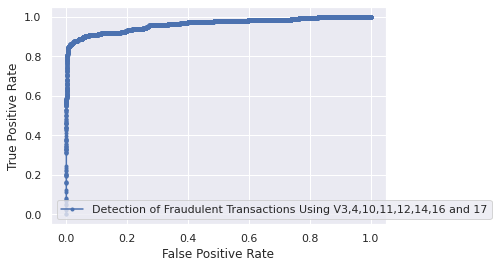

In [ ]:
#Plot the AUC curve
fpr_fraud_M10, tpr_fraud_M10, _ = roc_curve(y_train, 1-S_M10)

pyplot.plot(fpr_fraud_M10, tpr_fraud_M10, marker='.', label='Detection of Fraudulent Transactions Using V3,4,10,11,12,14,16 and 17')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

M10_AUC = roc_auc_score(y_train, 1-S_M10)

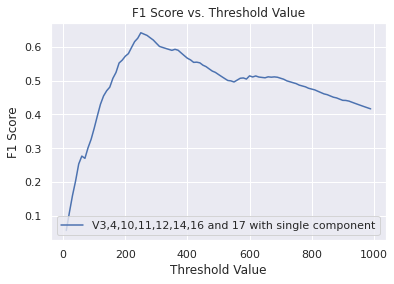

The maximum F1 score is:  0.642016806722689
The corresponding K value is:  250
The corresponding threshold value is:  -711.0890485359381


In [ ]:
#Plotting F1 score vs. K values
F1_M10 = np.reshape(F1_M10, (-1,1))
pyplot.plot(k, F1_M10, linestyle = '-', label='V3,4,10,11,12,14,16 and 17 with single component')
pyplot.xlabel('Threshold Value')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Threshold Value')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M10 = np.nan_to_num(F1_M10)

#Print the maximum F1 score and tis corresponding K value
print("The maximum F1 score is: ", np.amax(F1_M10))
print("The corresponding K value is: ", F1_M10.argmax()*10)
print("The corresponding threshold value is: ", sorted(S_M10)[F1_M10.argmax()])

M10_F1 = np.amax(F1_M10)

**Model 11: Supervised (fit on non-fraudulent transactions only). Fit feature 3, 4, 10, 11, 12, 14, 16 and 17 all together, with n_components = 1.**

In [ ]:
#Extracing non-fraudulent and fraudulent transactions from V4,11
V4_real = V4[real_transac,0].reshape(-1,1)
V4_fraud = V4[fraud_transac,0].reshape(-1,1)

V11_real = V11[real_transac,0].reshape(-1,1)
V11_fraud = V11[fraud_transac,0].reshape(-1,1)

#Combining V3,4,10,11,12,14,16,17 real transactions together
M11_tuple_real = (V3_real, V4_real, V10_real, V11_real, V12_real, V14_real, V16_real, V17_real)
M11_real = np.hstack(M11_tuple_real)

In [ ]:
#Find the best k using an increment of 10
gm_M11 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_M11.fit(M11_real)
S_M11 = gm_M11.score_samples(M10_X_train)
precision_M11 = []
recall_M11 = []
F1_M11 = []
k = np.arange(0,1000,10).reshape(100,1)

for i in range (0, 1000, 10):
  mn_M11 = sorted(S_M11)[i]
  precision_M11 = precision_score(y_train, S_M11 < mn_M11)
  recall_M11 = recall_score(y_train, S_M11 < mn_M11)
  F1_M11.append(2*precision_M11*recall_M11/(precision_M11+recall_M11))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


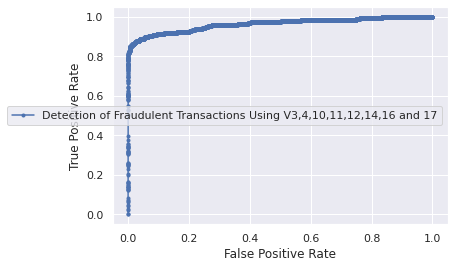

In [ ]:
#Plot the AUC curve
fpr_fraud_M11, tpr_fraud_M11, _ = roc_curve(y_train, 1-S_M11)

pyplot.plot(fpr_fraud_M11, tpr_fraud_M11, marker='.', label='Detection of Fraudulent Transactions Using V3,4,10,11,12,14,16 and 17')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

M11_AUC = roc_auc_score(y_train, 1-S_M11)

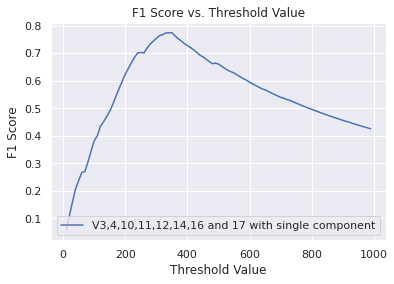

The maximum F1 score is:  0.7741007194244605
The corresponding K value is:  350
The corresponding threshold value is:  -1967.7305475631172


In [ ]:
#Plotting F1 score vs. K values
F1_M11 = np.reshape(F1_M11, (-1,1))
pyplot.plot(k, F1_M11, linestyle = '-', label='V3,4,10,11,12,14,16 and 17 with single component')
pyplot.xlabel('Threshold Value')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Threshold Value')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M11 = np.nan_to_num(F1_M11)

#Print the maximum F1 score and tis corresponding K value
print("The maximum F1 score is: ", np.amax(F1_M11))
print("The corresponding K value is: ", F1_M11.argmax()*10)
print("The corresponding threshold value is: ", sorted(S_M11)[F1_M11.argmax()])

M11_F1 = np.amax(F1_M11)

**Model 12: Supervised (fit on non-fraudulent transactions only). Fit feature 3, 4, 10, 11, 12, 14, 16 and 17 all together, with n_components = 5.**

In [ ]:
#Find the best k using an increment of 10
gm_M12 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm_M12.fit(M11_real)
S_M12 = gm_M11.score_samples(M10_X_train)
precision_M12 = []
recall_M12 = []
F1_M12 = []
k = np.arange(0,1000,10).reshape(100,1)

for i in range (0, 1000, 10):
  mn_M12 = sorted(S_M12)[i]
  precision_M12 = precision_score(y_train, S_M12 < mn_M12)
  recall_M12 = recall_score(y_train, S_M12 < mn_M12)
  F1_M12.append(2*precision_M12*recall_M12/(precision_M12+recall_M12))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


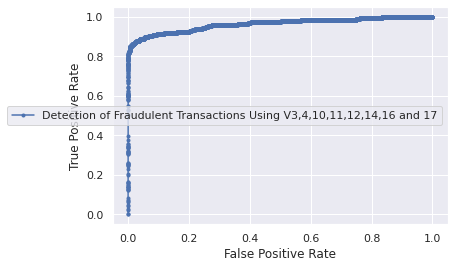

In [ ]:
#Plot the AUC curve
fpr_fraud_M12, tpr_fraud_M12, _ = roc_curve(y_train, 1-S_M12)

pyplot.plot(fpr_fraud_M12, tpr_fraud_M12, marker='.', label='Detection of Fraudulent Transactions Using V3,4,10,11,12,14,16 and 17')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

M12_AUC = roc_auc_score(y_train, 1-S_M12)

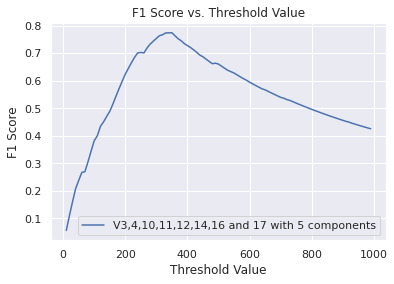

The maximum F1 score is:  0.7741007194244605
The corresponding K value is:  350
The corresponding threshold value is:  -1967.7305475631172


In [ ]:
#Plotting F1 score vs. K values
F1_M12 = np.reshape(F1_M12, (-1,1))
pyplot.plot(k, F1_M12, linestyle = '-', label='V3,4,10,11,12,14,16 and 17 with 5 components')
pyplot.xlabel('Threshold Value')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Threshold Value')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M12 = np.nan_to_num(F1_M12)

#Print the maximum F1 score and tis corresponding K value
print("The maximum F1 score is: ", np.amax(F1_M12))
print("The corresponding K value is: ", F1_M12.argmax()*10)
print("The corresponding threshold value is: ", sorted(S_M12)[F1_M12.argmax()])

M12_F1 = np.amax(F1_M12)

**Model 13: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 3, 4, 10, 11, 12, 14, 16 and 17 all together, with n_components = 5.**

In [ ]:
#Extracing fraudulent transactions from V3,4
V3_fraud = V3[fraud_transac,0].reshape(-1,1)

#Combining V3,4,10,11, 12,14,16,17 fraud transactions together
M13_tuple_fraud = (V3_fraud, V4_fraud, V10_fraud, V11_fraud, V12_fraud, V14_fraud, V16_fraud, V17_fraud)
M13_fraud = np.hstack(M13_tuple_fraud)

In [ ]:
#Fit Gaussian distribution with n_components = 5
gm1 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm1.fit(M11_real)

gm2 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm2.fit(M13_fraud)

#Calculate scores for real and fraud transactions
S_M13_real = gm1.score_samples (M10_X_train)
S_M13_fraud = gm2.score_samples (M10_X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


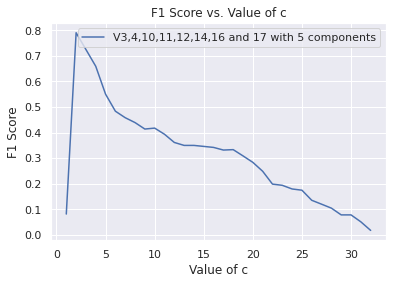

The maximum F1 score is:  0.7907647907647908
The corresponding c value is:  2


In [ ]:
#Finding optimal c value
F1_M13 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_M13 = precision_score(y_train, S_M13_real < S_M13_fraud*i)
  recall_M13 = recall_score(y_train, S_M13_real < S_M13_fraud*i)
  F1_M13.append(2*precision_M13*recall_M13/(precision_M13+recall_M13))

F1_M13 = np.reshape(F1_M13, (-1,1))
pyplot.plot(c, F1_M13, linestyle = '-', label='V3,4,10,11,12,14,16 and 17 with 5 components')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_M13 = np.nan_to_num(F1_M13)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_M13))
print("The corresponding c value is: ", F1_M13.argmax()+1)

M13_F1 = np.amax(F1_M13)

**Summarizing the findings in a table.**

In [ ]:
F1_array = np.array([M1_F1, M2_F1, M3_F1, M4_F1, M5_F1, M6_F1, M7_F1, M8_F1, M9_F1, M10_F1, M11_F1, M12_F1, M13_F1]).reshape(-1,1)
AUC_array = np.array(['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', M8_AUC, M9_AUC, M10_AUC, M11_AUC, M12_AUC, 'N/A']).reshape(-1,1)
Summary_Data_tuple = (F1_array, AUC_array)
Summary_Data = np.hstack(Summary_Data_tuple)
Summary_Data = Summary_Data.T
df_Summary = pd.DataFrame(data=Summary_Data, 
                          columns=['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11','M12','M13'], 
                          index = ['F1 Score','AUC'])
df_features = pd.DataFrame({"M1":['V12,V14,V17'],"M2":['V12,V14,V17'], "M3":['V12,V14,V17'], "M4":['V12,V14,V17'], "M5":['V10,V12,V14,V16,V17'],
                            "M6":['V10,V12,V14,V16,V17'],"M7":['V10,V12,V14,V16,V17'],"M8":['V10,V12,V14,V16,V17'],"M9":['V10,V12,V14,V16,V17'],
                            "M10":['V3,V4,V10,V11,V12,V14,V16,V17'],"M11":['V3,V4,V10,V11,V12,V14,V16,V17'],"M12":['V3,V4,V10,V11,V12,V14,V16,V17'],
                            "M13":['V3,V4,V10,V11,V12,V14,V16,V17']}, index=['Features Included'])
df_Summary = df_Summary.append(df_features)
df_methods = pd.DataFrame({"M1":['Supervised, fit on both real and fraudulent'],"M2":['Supervised, fit on both real and fraudulent'], "M3":['Supervised, fit on both real and fraudulent'], "M4":['Supervised, fit on both real and fraudulent'], "M5":['Supervised, fit on both real and fraudulent'],
                            "M6":['Supervised, fit on both real and fraudulent'],"M7":['Supervised, fit on both real and fraudulent'],"M8":['Semi-supervised'],"M9":['Semi-supervised'],
                            "M10":['Semi-supervised'],"M11":['Supervised, fit on real only'],"M12":['Supervised, fit on real only'],
                            "M13":['Supervised, fit on both real and fraudulent']}, index=['Methods'])
df_Summary = df_Summary.append(df_methods)
df_components = pd.DataFrame({"M1":[1],"M2":[3], "M3":[5], "M4":[10], "M5":[1],
                            "M6":[5],"M7":[3],"M8":[1],"M9":[5],
                            "M10":[1],"M11":[1],"M12":[5],
                            "M13":[5]}, index=['Number of Components'])
df_Summary = df_Summary.append(df_components)
df_Summary

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13
F1 Score,0.7919876733436055,0.7553648068669528,0.7827380952380953,0.7901234567901235,0.7981510015408321,0.7744807121661721,0.8184615384615386,0.6397306397306398,0.4793388429752066,0.642016806722689,0.7741007194244605,0.7741007194244605,0.7907647907647908
AUC,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0.960098238380998,0.9558316295050411,0.9623167579003999,0.962538220988441,0.962538220988441,N/A
Features Included,"V12,V14,V17","V12,V14,V17","V12,V14,V17","V12,V14,V17","V10,V12,V14,V16,V17","V10,V12,V14,V16,V17","V10,V12,V14,V16,V17","V10,V12,V14,V16,V17","V10,V12,V14,V16,V17","V3,V4,V10,V11,V12,V14,V16,V17","V3,V4,V10,V11,V12,V14,V16,V17","V3,V4,V10,V11,V12,V14,V16,V17","V3,V4,V10,V11,V12,V14,V16,V17"
Methods,"Supervised, fit on both real and fraudulent","Supervised, fit on both real and fraudulent","Supervised, fit on both real and fraudulent","Supervised, fit on both real and fraudulent","Supervised, fit on both real and fraudulent","Supervised, fit on both real and fraudulent","Supervised, fit on both real and fraudulent",Semi-supervised,Semi-supervised,Semi-supervised,"Supervised, fit on real only","Supervised, fit on real only","Supervised, fit on both real and fraudulent"
Number of Components,1,3,5,10,1,5,3,1,5,1,1,5,5


*As shown, for M1,M2,M3 and M4, F1 score showed an increasing trend when the number of components became larger than 3, indicating the beginning of overfitting.*

## **Part 6: Evaluating performance on test set:** [1 Mark]
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


*Best model is M7: Supervised (fit on non-fraudulent and fraudulent transactions separately). Fit feature 10, 12, 14, 16 and 17 all together, with n_components = 3.*

In [ ]:
y_test = y_test.to_numpy()

#Extracting the indices of real transactions and fraud transactions in V3
real_transac_test = np.where(y_test == 0)[0]
fraud_transac_test = np.nonzero(y_test)[0]
print(real_transac_test)
print(fraud_transac_test)

[    0     1     2 ... 85440 85441 85442]
[  365  1156  3037  3100  4307  4608  5286  5307  6730  6893  6940  7131
  7496  7878  8072  8139  8227  8374  8741  8861  9062  9140  9744  9757
  9941 10291 10339 11693 12389 13034 13384 13797 14955 16008 16410 16460
 17493 18527 19111 19346 20371 20429 20827 22124 22496 23102 23204 23387
 24496 24520 24643 25629 27509 28185 28370 28764 29738 30244 30986 31059
 31927 32179 34368 35320 37076 37501 37652 38679 39034 41201 41434 42156
 42564 42672 43007 43359 43681 44464 45002 45249 45485 45512 45792 46053
 46434 46903 47099 47582 47873 48825 49663 49928 50129 51817 52172 52244
 52623 52687 52983 53225 56539 57479 58930 59430 59474 59788 60051 61317
 62507 62519 62665 62940 64130 65010 65551 66031 66324 66497 68168 70427
 71585 72027 72876 73731 74451 74671 74929 74983 77896 79178 79383 80152
 80756 80920 81106 81344 81432 81617 82020 82186 82563 82867 83884 84704
 84709 84753 84797]


In [ ]:
#Combining V10,12,14,16,17 together
V10_test = X_test['V10'].to_numpy().reshape(-1,1)
V10_test_real = V10_test[real_transac_test,0].reshape(-1,1)
V10_test_fraud = V10_test[fraud_transac_test,0].reshape(-1,1)

V12_test = X_test['V12'].to_numpy().reshape(-1,1)
V12_test_real = V12_test[real_transac_test,0].reshape(-1,1)
V12_test_fraud = V12_test[fraud_transac_test,0].reshape(-1,1)

V14_test = X_test['V14'].to_numpy().reshape(-1,1)
V14_test_real = V14_test[real_transac_test,0].reshape(-1,1)
V14_test_fraud = V14_test[fraud_transac_test,0].reshape(-1,1)

V16_test = X_test['V16'].to_numpy().reshape(-1,1)
V16_test_real = V16_test[real_transac_test,0].reshape(-1,1)
V16_test_fraud = V16_test[fraud_transac_test,0].reshape(-1,1)

V17_test = X_test['V17'].to_numpy().reshape(-1,1)
V17_test_real = V17_test[real_transac_test,0].reshape(-1,1)
V17_test_fraud = V17_test[fraud_transac_test,0].reshape(-1,1)

#Combining V10,12,14,16,17 real transactions together
Test_tuple_real = (V10_test_real, V12_test_real, V14_test_real, V16_test_real, V17_test_real)
Test_real = np.hstack(Test_tuple_real)

#Combining V10,12,14,16,17 fraud transactions together
Test_tuple_fraud = (V10_test_fraud, V12_test_fraud, V14_test_fraud, V16_test_fraud, V17_test_fraud)
Test_fraud = np.hstack(Test_tuple_fraud)

#Creating X_test containing these features
Test_data = (V10_test, V12_test, V14_test, V16_test, V17_test)
X_test_P6 = np.hstack(Test_data)

In [ ]:
#Fit Gaussian distribution with n_components = 3
gm1 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm1.fit(Test_real)

gm2 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm2.fit(Test_fraud)

#Calculate scores for real and fraud transactions
S_real_P6 = gm1.score_samples (X_test_P6)
S_fraud_P6 = gm2.score_samples (X_test_P6)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


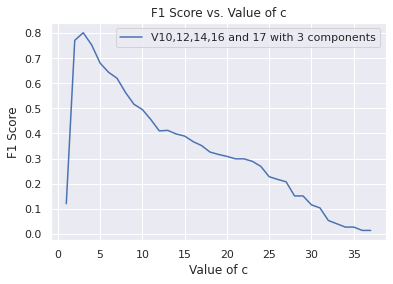

The maximum F1 score is:  0.8014705882352942
The corresponding c value is:  3
The corresponding precision score is:  0.872
The corresponding recall socre is:  0.7414965986394558


In [ ]:
#Finding optimal c value
F1_P6 = []
c = np.arange(1,51,1).reshape(50,1)

for i in range (1,51,1):
  precision_P6 = precision_score(y_test, S_real_P6 < S_fraud_P6*i)
  recall_P6 = recall_score(y_test, S_real_P6 < S_fraud_P6*i)
  F1_P6.append(2*precision_P6*recall_P6/(precision_P6+recall_P6))

F1_P6 = np.reshape(F1_P6, (-1,1))
pyplot.plot(c, F1_P6, linestyle = '-', label='V10,12,14,16 and 17 with 3 components')
pyplot.xlabel('Value of c')
pyplot.ylabel('F1 Score')
pyplot.title('F1 Score vs. Value of c')
pyplot.legend()
pyplot.show()

#Replacing NaN with 0
F1_P6 = np.nan_to_num(F1_P6)

#Print the maximum F1 score and its corresponding c value
print("The maximum F1 score is: ", np.amax(F1_P6))
print("The corresponding c value is: ", F1_P6.argmax()+1)

#Calculating precision and recall using the optimal c value
precision_P6 = precision_score(y_test, S_real_P6 < S_fraud_P6*3)
recall_P6 = recall_score(y_test, S_real_P6 < S_fraud_P6*3)

print("The corresponding precision score is: ", precision_P6)
print("The corresponding recall socre is: ", recall_P6)